In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import projet3

from projet3 import utils
from projet3 import ead

results_folder = Path(projet3.__file__).with_name("results")

data_df = ead.get_data()

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# ANALYSES STATISTIQUES UNIVARIÉES
Dans cette partie nous allons procéder à l'analyse univariée sur les colonnes retenues dans le cadre de notre analyse.

## Choix des colonnes
Dans un premier temps, sont retenues les colonnes pour lesquelles 70% de lignes sont remplies

In [12]:
completude_df = pd.read_csv(results_folder.joinpath("completude_columns.csv").as_posix())
completude_gt_70 = completude_df[completude_df["Completude"] >= 70.0]
completude_gt_70

,Unnamed: 0,Column,Completude
0,0,code,100.000000
1,1,url,100.000000
2,2,creator,99.999703
3,3,created_t,100.000000
4,4,created_datetime,99.999901
5,5,last_modified_t,100.000000
6,6,last_modified_datetime,100.000000
7,7,product_name,95.119075
31,31,countries,99.827663
32,32,countries_tags,99.827564


Seules les colonnes
```
68                energy_100g
70                   fat_100g
71         saturated-fat_100g
106        carbohydrates_100g
107               sugars_100g
117             proteins_100g
121                 salt_100g
122               sodium_100g
```
Correspondent à des données quantitatives. La colonnes 'energy_100g' ne correspond ni à un macronutiment ni à un micronutriment, elle ne sera pas prise en compte. Etant donné le cadre de notre étude, afin de connaitre la répartition des micronutriments, nous allons donc étendre notre analyse à certaines colonnes incluses dans:

In [3]:
completude_df[(completude_df["Completude"] >= 10.0)&(completude_df["Completude"] < 70.0)]

,Unnamed: 0,Column,Completude
9,9,quantity,31.356267
10,10,packaging,18.474022
11,11,packaging_tags,18.473428
12,12,brands,58.923307
13,13,brands_tags,58.918451
14,14,categories,36.906323
15,15,categories_tags,36.905926
16,16,categories_en,36.905926
21,21,labels,19.570972
22,22,labels_tags,19.573350


On retient alors les colonnes suivantes
```
104	trans-fat_100g	14.303652
105	cholesterol_100g	14.382140
124	vitamin-a_100g	13.779704
129	vitamin-c_100g	14.132801
143	calcium_100g	14.473610
145	iron_100g	14.142711
```
Bien que les fibres soient intéressantes dans le cadre de l'alimentation des sportifs, elles ne rentrent pas dans le cadre de notre étude.
On regrettera de ne pas pouvoir retenir les vitamines B, leur couverture étant trop faible.

In [4]:
all_columns = [
    'calcium_100g','cholesterol_100g', 'trans-fat_100g', 'iron_100g',
    'vitamin-c_100g', 'vitamin-a_100g', 'fat_100g', 'saturated-fat_100g', 
    'sugars_100g', 'carbohydrates_100g', 'proteins_100g','salt_100g',  
    'sodium_100g'
]
categories_columns = ['code', 'product_name']

## Détection et traitement des données aberrantes.

In [5]:
# Restrictions aux index étudiés
data_restricted_df = data_df[all_columns]
data_restricted_df.describe()

,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,vitamin-c_100g,vitamin-a_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,salt_100g,sodium_100g
count,146049.000000,145126.000000,144334.000000,142710.000000,142610.000000,139047.000000,8.044550e+05,7.748310e+05,7.903930e+05,804412.000000,8.063660e+05,7.865370e+05,7.864860e+05
mean,0.214219,0.028468,0.073794,0.006987,0.038394,0.003074,2.495856e+01,1.111774e+01,2.002262e+01,29.904906,1.185912e+02,1.055407e+02,4.241152e+01
std,6.556936,0.901867,1.494106,0.339303,2.763584,0.454334,9.756626e+03,5.099556e+03,5.146044e+03,961.252502,9.889830e+04,9.120719e+04,3.648451e+04
min,0.000000,0.000000,-3.570000,-0.000260,-0.002100,-0.000340,0.000000e+00,0.000000e+00,-1.786000e+01,0.000000,-8.000000e+02,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e-01,1.000000e-01,8.000000e-01,3.570000,1.200000e+00,6.000000e-02,2.000000e-02
50%,0.036000,0.000000,0.000000,0.001030,0.000000,0.000000,6.800000e+00,1.900000e+00,4.000000e+00,15.400000,5.700000e+00,5.200000e-01,2.001520e-01
75%,0.114000,0.020000,0.000000,0.002480,0.004000,0.000107,2.140000e+01,7.400000e+00,2.000000e+01,54.000000,1.200000e+01,1.343660e+00,5.280000e-01
max,950.000000,141.000000,369.000000,50.000000,716.981100,100.000000,8.748748e+06,4.488758e+06,4.574988e+06,857855.000000,8.880858e+07,8.088869e+07,3.235548e+07


On constate des données < 0 et d'autres > 100g, on va donc procéder à des remplacements, les données qui semblent < 0 et > 100 seront remplacées par la valeur médiane de la serie alors que les données non numériques seront elles remplacées par la valeur 0. 

On procède à ce type de remplacement afin de conserver la même forme de distribution.

In [6]:
for c in data_restricted_df.columns:
    data_restricted_df[c][data_restricted_df[c] <= 0] = data_restricted_df[c].median()
    data_restricted_df[data_restricted_df >= 100] = data_restricted_df[c].median()
    data_restricted_df[data_restricted_df.isna()] = 0
    data_restricted_df[data_restricted_df.isnull()] = 0
    

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [7]:
# Vérification
data_restricted_df.describe()

,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,vitamin-c_100g,vitamin-a_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,salt_100g,sodium_100g
count,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06,1.009071e+06
mean,1.839438e-02,3.700970e-03,9.732139e-03,9.881689e-04,3.114166e-03,2.254810e-04,1.117251e+01,4.185724e+00,1.151205e+01,2.451161e+01,7.636292e+00,1.105378e+00,4.650445e-01
std,3.626446e-01,2.547620e-01,3.600448e-01,1.276237e-01,2.576120e-01,9.287011e-02,1.497129e+01,7.117624e+00,1.811611e+01,2.578913e+01,8.493764e+00,4.407878e+00,2.110167e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-10,1.000000e-16,1.000000e-27,1.000000e-20,1.000000e-24,1.000000e-29,4.000000e-30
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,5.000000e-01,1.900000e+00,8.100000e+00,3.380000e+00,1.500000e-01,5.600000e-02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,5.000000e-01,1.900000e+00,8.100000e+00,3.380000e+00,1.500000e-01,5.600000e-02
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.650000e+01,5.000000e+00,1.208000e+01,4.520000e+01,9.500000e+00,1.080000e+00,4.257040e-01
max,9.900600e+01,9.790000e+01,8.570000e+01,5.000000e+01,8.572000e+01,7.300000e+01,9.999000e+01,9.990000e+01,9.999000e+01,9.999000e+01,9.900000e+01,9.999000e+01,9.800000e+01


Visualisation des boites à moustache

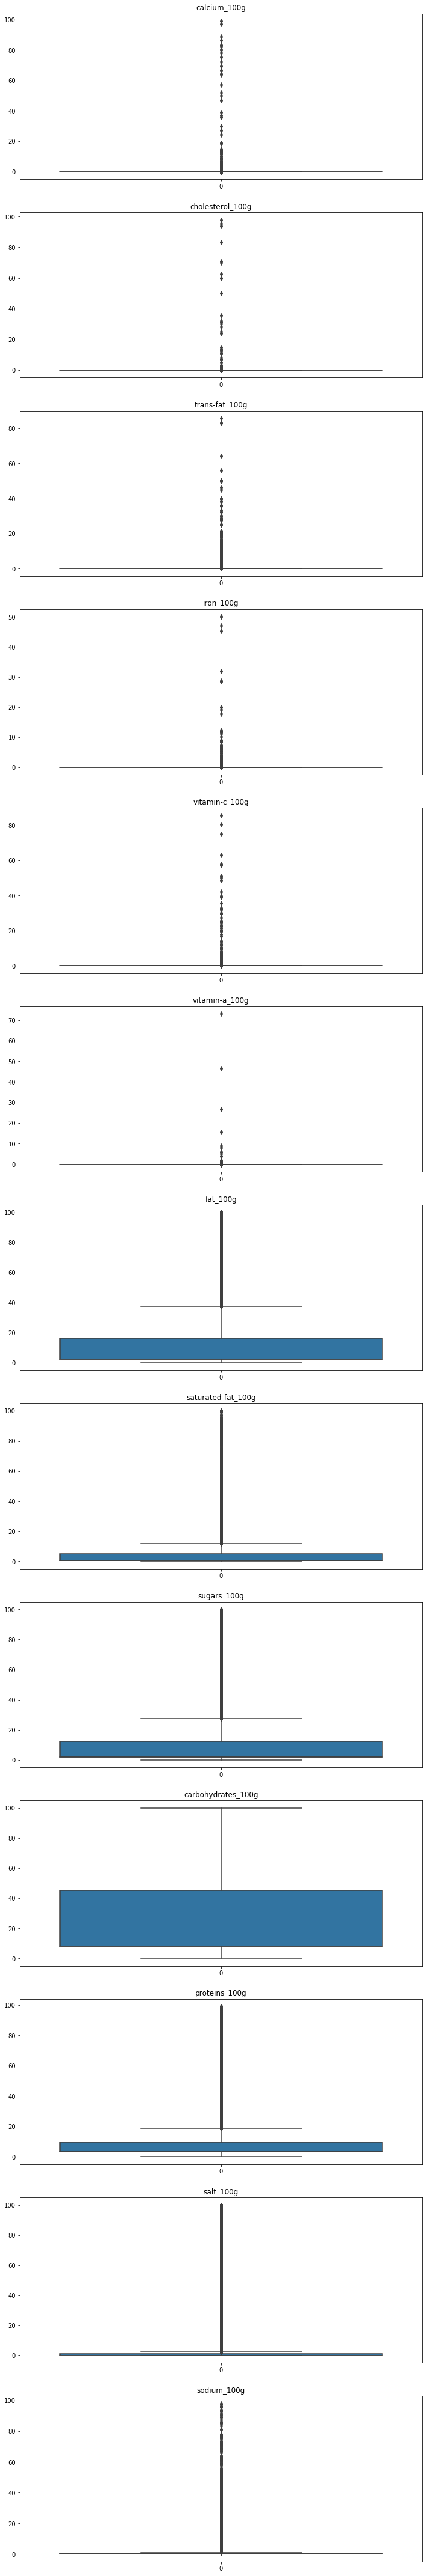

In [8]:
n = len(data_restricted_df.columns)
fig, ax = plt.subplots(n, 1, figsize=(24,n*12))
for i, c in enumerate(data_restricted_df.columns):
    plt.sca(ax[i])
    try:
        ax_ = sns.boxplot(data=data_restricted_df[c])
        plt.title(c)
    except ValueError as error:
        print(error)

## Résultats

Pour les colonnes, calcium_100g, cholesterol_100g,trans-fat_100g, iron_100g, vitamin-c_100g, vitamin-a_100g les données sont trop applaties, nous avons un problème d'échelle. 
Ces données seront traitées en mg pour 100g.

In [9]:
data_restricted_df["calcium_100g"] *= 1000
data_restricted_df["cholesterol_100g"] *= 1000
data_restricted_df["trans-fat_100g"] *= 1000
data_restricted_df["vitamin-c_100g"] *= 1000
data_restricted_df["vitamin-a_100g"] *= 1000

# sauvegarde pour utilisation ultérieure
data_restricted_df.to_csv(results_folder.joinpath("data_restricted_df.csv").as_posix())


/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Affichage des boites à moustache sans les outliers afin de pouvoir afficher les quartiles pour toutes les colonnes.

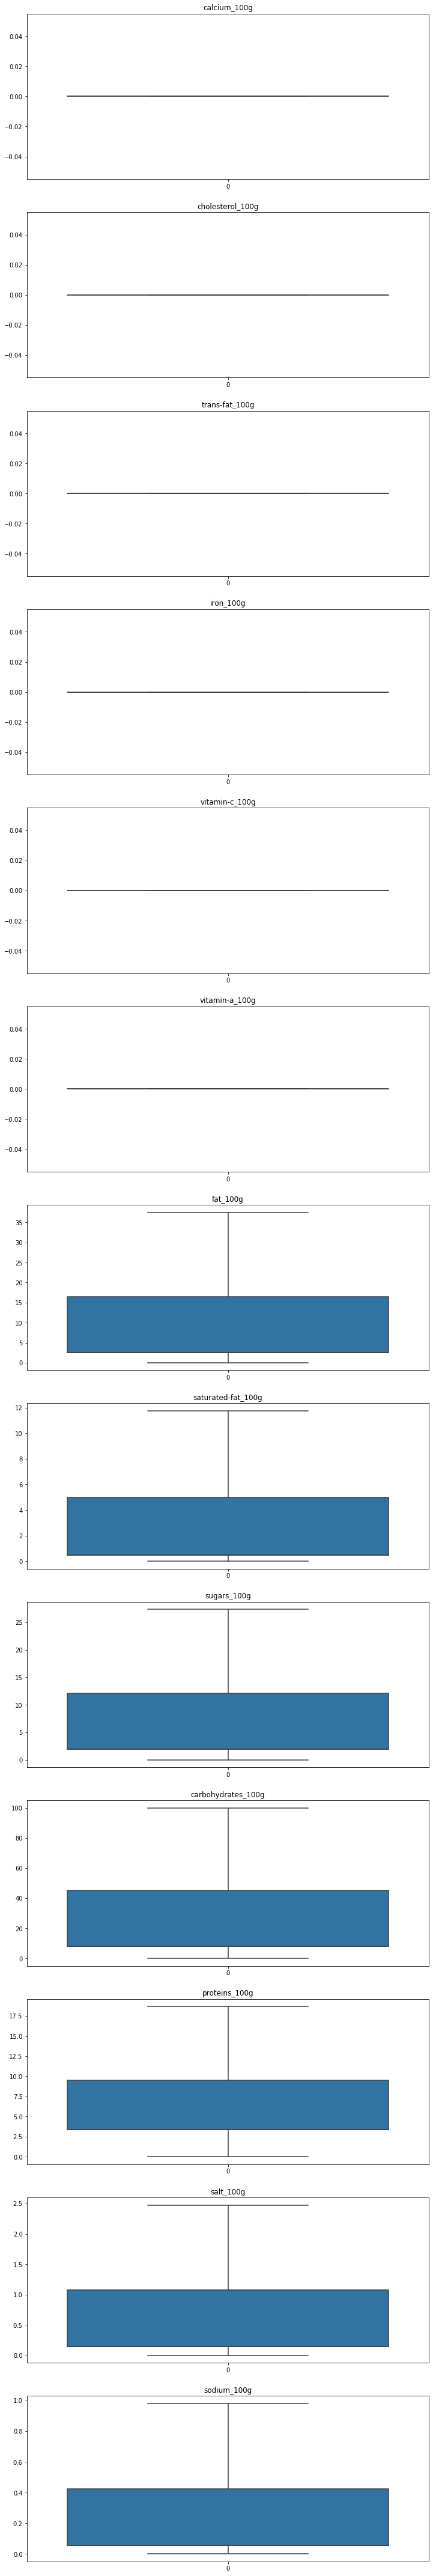

In [10]:
n = len(data_restricted_df.columns)
fig, ax = plt.subplots(n, 1, figsize=(24,n*12))
for i, c in enumerate(data_restricted_df.columns):
    plt.sca(ax[i])
    try:
        y_values = data_restricted_df[c]
        # affichage sans les outilers
        ax_ = sns.boxplot(data=data_restricted_df[c], showfliers=False)
        plt.title(c)
        #plt.ylim(0, 110)
    except ValueError as error:
        print(error)

## Affichage des histogrammes pour les différents index

Analyse de calcium_100g
count    1.009071e+06
mean     1.839438e+01
std      3.626446e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.900600e+04
Name: calcium_100g, dtype: float64
Analyse de cholesterol_100g
count    1.009071e+06
mean     3.700970e+00
std      2.547620e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.790000e+04
Name: cholesterol_100g, dtype: float64
Analyse de trans-fat_100g
count    1.009071e+06
mean     9.732139e+00
std      3.600448e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.570000e+04
Name: trans-fat_100g, dtype: float64
Analyse de iron_100g
count    1.009071e+06
mean     9.881689e-04
std      1.276237e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+01
Name: iron_100g, dtype: float64
Analyse de vitamin-c_100g
count    1.009071e+06
mean  

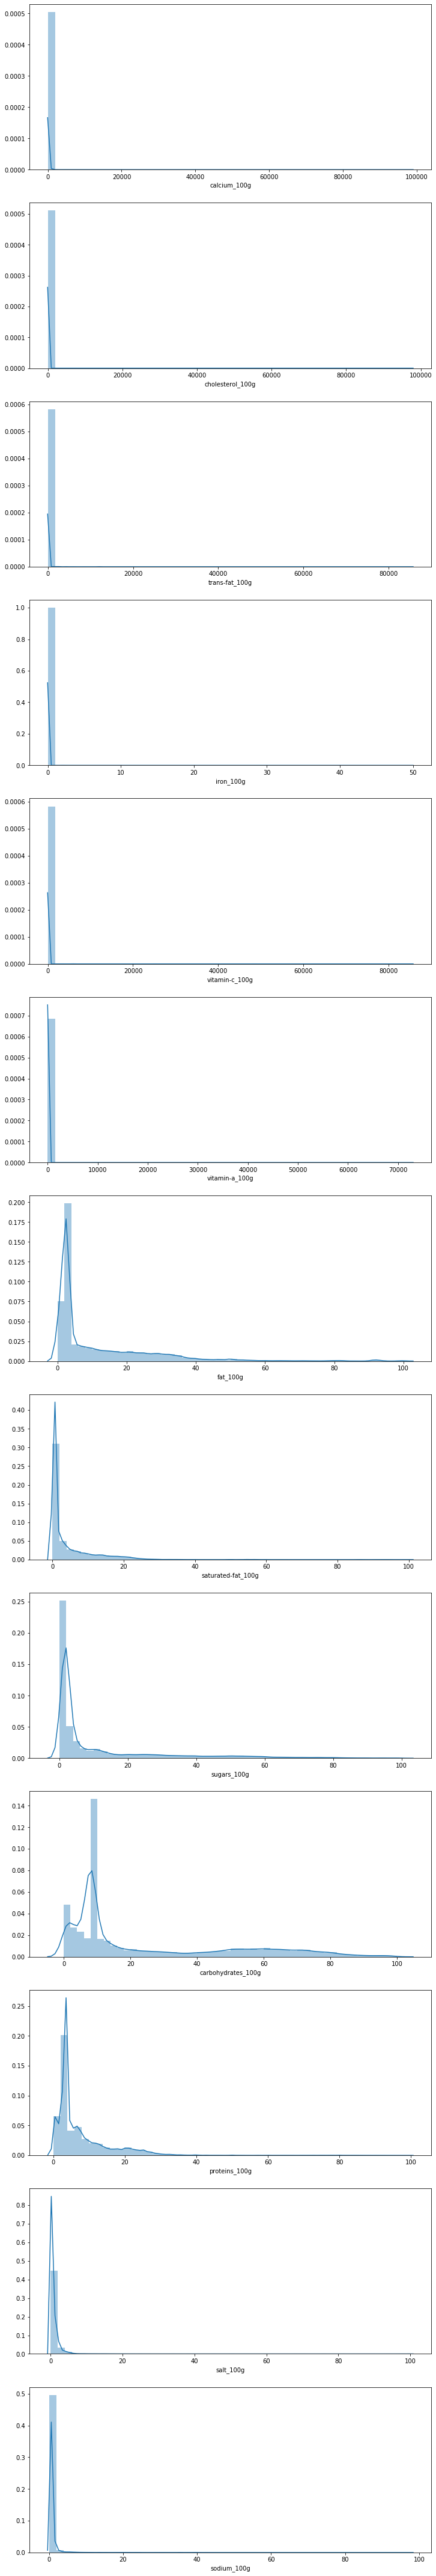

In [11]:
# 
columns  = all_columns
data_restricted_df[columns][data_restricted_df[columns].isna()] = 0
n = len(columns)
fig, ax = plt.subplots(n, 1, figsize=(24 ,n*12))

for i, s in enumerate(columns):
    try:
        plt.sca(ax[i])
        print(f"Analyse de {s}")
        print(data_restricted_df[s].describe())
        sns.distplot(data_restricted_df[s], kde=True, norm_hist=True)
    except Exception as error:
        print(f'{error} while the display')


## Résultats
Une fois de plus on constate que les colonnes calcium_100g, cholesterol_100g, trans-fat_100g, iron_100g, vitamin-c_100g sont très applaties. Pour les autres index on constate une répartition asymétrique vers la droite avec une valeur modal assez proche de 0. 

## Conclusion
Etant donnée le cadre de notre projet; répartition des macronutriment et/ou micronutriments dans le cadre d'une alimentation de sportif. 
Nous allons omettre ces colonnes afin de préciser notre projet et nous concentrer sur la répartition des macronutriments.